# Q. 61-70


In [3]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

## Q.61,62はパス

## Q. 63-65. 細線化処理
細線化処理はBlobのトポロジカルな性質を保持して線を細くしていく処理なので，例のようにブツ切りになるのはthinningとは言えない。ただ削るのはShrink。ちなみにthinningは実装が泥臭くて面倒なせいか，OpenCVでもcontribにしか入っていない。昔は皆自力で実装してた。現在のところ THINNING_ZHANGSUEN， THINNING_GUOHALLがある。

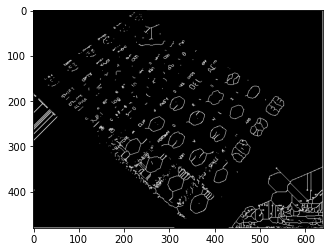

In [4]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
ret, bimg = cv2.threshold(gimg, -1, 255, cv2.THRESH_OTSU)
dst = cv2.ximgproc.thinning(bimg, cv2.ximgproc.THINNING_GUOHALL)
plt.imshow(dst, cmap='gray')

これだと訳がわからないので，指紋を例に処理する。

※画像は[ここ](https://commons.wikimedia.org/wiki/File:Fingerprint_%28PSF%29.png)から

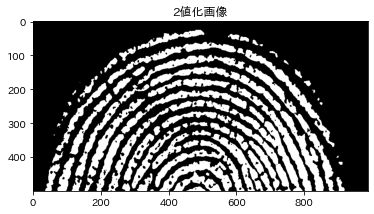

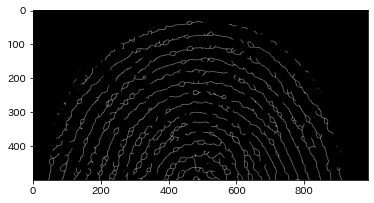

In [8]:
import japanize_matplotlib # この一行を追記する
gimg = cv2.imread('Fingerprint_(PSF).png', cv2.IMREAD_GRAYSCALE)
ret, bimg = cv2.threshold(gimg, -1, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(bimg[0:500], cmap='gray')
plt.title('2値化画像')
plt.figure()
dst1 = cv2.ximgproc.thinning(binimg, cv2.ximgproc.THINNING_GUOHALL)
plt.imshow(dst1[0:500,:], cmap='gray')

のようになってしまうので若干ボカしてから2値化してMorphological ProcessingのClosing処理が必要。チューニング不足でやや不満が残るがだいぶマシになる。

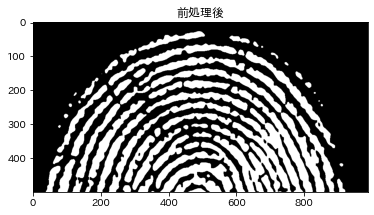

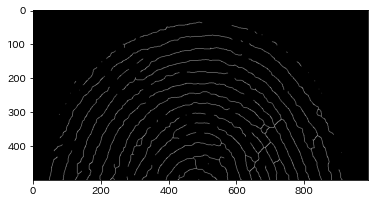

In [24]:
blurimg = cv2.GaussianBlur(img, (9,9), 5)
ret, bimg = cv2.threshold(blurimg, -1, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (2,4))
dst2 = cv2.morphologyEx(bimg, cv2.MORPH_CLOSE, kernel=SE, iterations=2)
plt.imshow(dst2[0:500], cmap='gray')
plt.title('前処理後')
plt.figure()
dst3 = cv2.ximgproc.thinning(dst2, cv2.ximgproc.THINNING_GUOHALL)
plt.imshow(dst3[0:500,:], cmap='gray')

Zhang-Suenの方も

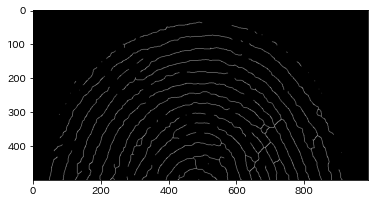

In [25]:
dst3 = cv2.ximgproc.thinning(dst2, cv2.ximgproc.THINNING_ZHANGSUEN)
plt.imshow(dst3[0:500,:], cmap='gray')

## Q. 66-69. HOG
内部の実装についてはOpenCVのsamples/pythonでのdigits.pyで，preprocess_hogを見ると良い。Sobelでx, y方向の勾配gx, gyを求めた後でcartToPlar(gx, gy)で一気に勾配強度と勾配角度を求めている。
OpenCVで直ぐ使いたい場合にはHOGDescriptorがあり，人の検知をしたいときにはHOGDescriptor_getDefaultPeopleDetectorでSVM用のclassifierが準備できる。(サンプルのpeopledetecotr.py参照)

また，visualizeをしたい場合はscikit-imageを使うのが手っ取り早い

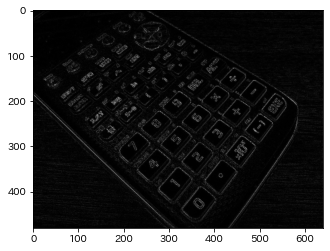

In [40]:
import numpy as np
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
grad = np.zeros(gimg.shape)
angleOfs = np.zeros(gimg.shape)
#winSize = gimg.shape
winSize = (32, 64)
blockSize = (24,24)
blockStride = (8,8)
cellSize = (8, 8)
nbins = 9
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
grad, angleOfs = hog.computeGradient(gimg, grad, angleOfs)
plt.imshow(grad[:,:,0], cmap='gray')

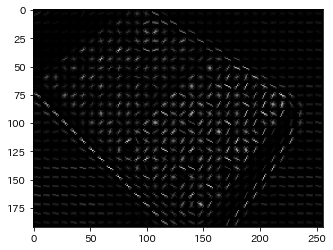

In [43]:
from skimage.feature import hog
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
gimg = cv2.resize(gimg, dsize=None, fx=0.4, fy=0.4)
descriptor , hogimg = hog(gimg, orientations = 8, pixels_per_cell=(8,8), cells_per_block=(3,3), visualize=True)
plt.imshow(hogimg, cmap='gray')

## Q. 70. カラートラッキング
特定の色の画素を抽出する場合，RGBよりも別の色空間の方がやりやすい。HSVなりL* a * b * 等であれば色情報については一応1チャネルで表現されている。OpenCVの場合cvtColorとThresholdを使えば良い。また，BGR画像の時点でfloat32型にしてしまえばHSV画像にしたときにHチャネルは0〜360にスケーリングされるので楽。

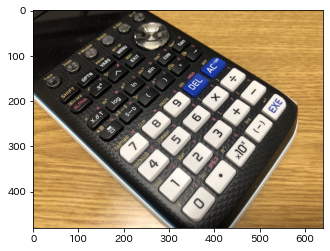

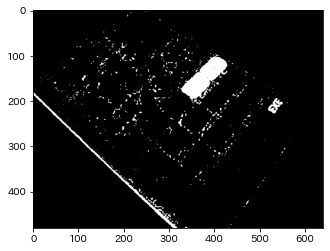

In [47]:
cimg = cv2.imread('Calc.jpg').astype(np.float32)/255.0
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
hsvimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2HSV)
himg = hsvimg[:,:,0]
hmask = np.zeros(himg.shape)
hmask[(himg<=260)&(himg>=180)] = 1.0
plt.figure()
plt.imshow(hmask, cmap='gray')